In [1]:
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.utils import np_utils
import joblib
from scipy import stats
import tensorflow as tf
from datetime import datetime


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

tf.keras.backend.clear_session()

pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')


print('################################################################')
print('#Welcome to the Python Script generated for the TMA project    #')
print('#Botnet detection using a 1DCNN deep learning model            #')
print('#Used only for educational purposes                            #')
print('################################################################')

print('\n>>> All libraries imported correctly. Tensorflow and Keras initiated in a properly way.')

################################################################
#Welcome to the Python Script generated for the TMA project    #
#Botnet detection using a 1DCNN deep learning model            #
#Used only for educational purposes                            #
################################################################

>>> All libraries imported correctly. Tensorflow and Keras initiated in a properly way.


In [2]:
print('###### Importing the dataset data to apply preprocessing techniques in order to improve the CTU-13 dataset and train the 1DCNN model ######')

data_path=os.getcwd()+'/Data'
df_scenario10=pd.read_csv(data_path+'/CTU13-Scenario10-ready-twoLabels.csv', delimiter=',')
df_scenario11 = pd.read_csv(data_path+'/CTU13-Scenario11-ready-twoLabels.csv', delimiter=',')
print('\n>>> CTU-13 Dataset with label cluster applied (OpenRefine tool, clustering with key collision and metaphone3 algorithm).\n>>> Shape:', df_scenario10.shape, '\n>>> Scenario 10 traffic classified in: background and botnet.')
print('\n>>> CTU-13 Dataset with label cluster applied (OpenRefine tool, clustering with key collision and metaphone3 algorithm).\n>>> Shape: ', df_scenario11.shape, '\n>>> Scenario 11 traffic classified in: background and botnet.')

###### Importing the dataset data to apply preprocessing techniques in order to improve the CTU-13 dataset and train the 1DCNN model ######

>>> CTU-13 Dataset with label cluster applied (OpenRefine tool, clustering with key collision and metaphone3 algorithm).
>>> Shape: (149814, 15) 
>>> Scenario 10 traffic classified in: background and botnet.

>>> CTU-13 Dataset with label cluster applied (OpenRefine tool, clustering with key collision and metaphone3 algorithm).
>>> Shape:  (16328, 15) 
>>> Scenario 11 traffic classified in: background and botnet.


/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/916843518.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scenario10=pd.read_csv(data_path+'/CTU13-Scenario10-ready-twoLabels.csv', delimiter=',')


In [3]:
print('###### Dataset before transformation ######\n')
print('>>> Scenario 10:')
df_scenario10.head()

###### Dataset before transformation ######

>>> Scenario 10:


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2.752.656.250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background
1,2011/08/18 09:56:42.630892,1.849.315.552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background
2,2011/08/18 09:56:44.640650,2.091.747.314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
3,2011/08/18 10:10:52.782230,1.535.769.409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


In [4]:
print('>>> Scenario 11:')
df_scenario10.head()

>>> Scenario 11:


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2.752.656.250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background
1,2011/08/18 09:56:42.630892,1.849.315.552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background
2,2011/08/18 09:56:44.640650,2.091.747.314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
3,2011/08/18 10:10:52.782230,1.535.769.409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


In [5]:
print('###### Data types of scenario 10 before transformation ######\n')
print(df_scenario10.dtypes)
print('\n###### Data types of scenario 11 before transformation ######\n')
print(df_scenario11.dtypes)

###### Data types of scenario 10 before transformation ######

StartTime     object
Dur           object
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

###### Data types of scenario 11 before transformation ######

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos           int64
dTos           int64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object


In [6]:
print('###### Grouping datasets ######\n')
df = pd.concat([df_scenario10, df_scenario11], axis=0)
print('>>> New head() of the concatenation of both datasets with the new shape of ', df.shape)
df.head()

###### Grouping datasets ######

>>> New head() of the concatenation of both datasets with the new shape of  (166142, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2.752.656.250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background
1,2011/08/18 09:56:42.630892,1.849.315.552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background
2,2011/08/18 09:56:44.640650,2.091.747.314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
3,2011/08/18 10:10:52.782230,1.535.769.409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


In [7]:
# Transform to numeric values (Proto, Dir, <<State>>, Label)
# Proto
print(">>> Mapping the protocol of groupped dataset...")
PROTO = "Proto_mapped"
protoLE = preprocessing.LabelEncoder()
df[PROTO] = protoLE.fit_transform(df["Proto"].values.ravel())


# Dir //Not used to train the model
#DIR = "Dir_Encoded"
#dirLE = preprocessing.LabelEncoder()
#df[DIR] = dirLE.fit_transform(df["Dir"].values.ravel())

# Label
print(">>> Mapping the labels of of groupped dataset...")
LABEL = "Label_mapped"
le = preprocessing.LabelEncoder()
df[LABEL] = le.fit_transform(df["Label"].values.ravel())
labels_mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))

df.head()

>>> Mapping the protocol of groupped dataset...
>>> Mapping the labels of of groupped dataset...


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Proto_mapped,Label_mapped
0,2011/08/18 09:56:29.146156,2.752.656.250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background,12,0
1,2011/08/18 09:56:42.630892,1.849.315.552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background,12,0
2,2011/08/18 09:56:44.640650,2.091.747.314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background,12,0
3,2011/08/18 10:10:52.782230,1.535.769.409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background,12,0
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background,11,0


In [8]:
print('###### Starting removing different features that are not used for training ######\n')
print('>>> Removing StartTime')
print('>>> Removing State')
print('>>> Removing SrcAddr')
print('>>> Removing DstAddr')
print('>>> Removing Dir')
print('>>> Removing Sport')
print('>>> Removing Dport')
print('>>> Removing sTos')
print('>>> Removing dTos')
print('>>> Removing SrcBytes')
print('>>> Removing Label, previously mapped to integers')
print('>>> Removing Proto, previously mapped to integers')

option = int(input('>>> Do you want to drop also Proto, which is so related with the labels Background & Botnet?\n1. Yes\n2. No'))
if option == 1:
    df.drop(['StartTime','State' ,'SrcAddr','DstAddr', 'Dir', 'Sport', 'Dport', 'sTos', 'dTos', 'SrcBytes', 'Label', 'Proto', 'Proto_mapped'], axis=1, inplace= True)
else:
    df.drop(['StartTime','State' ,'SrcAddr','DstAddr', 'Dir', 'Sport', 'Dport', 'sTos', 'dTos', 'SrcBytes', 'Label', 'Proto'], axis=1, inplace= True)

# Uncomment these lines if do you want remove blank columns... not used for training our 1DCNN model
#df = df.dropna('columns')
#df = df[[col for col in df if df[col].nunique() > 1]]

df.head()

###### Starting removing different features that are not used for training ######

>>> Removing StartTime
>>> Removing State
>>> Removing SrcAddr
>>> Removing DstAddr
>>> Removing Dir
>>> Removing Sport
>>> Removing Dport
>>> Removing sTos
>>> Removing dTos
>>> Removing SrcBytes
>>> Removing Label, previously mapped to integers
>>> Removing Proto, previously mapped to integers


,Dur,TotPkts,TotBytes,Label_mapped
0,2.752.656.250,3,435,0
1,1.849.315.552,3,417,0
2,2.091.747.314,2,290,0
3,1.535.769.409,2,290,0
4,0.002636,6,490,0


In [9]:
print('###### Data types of both scenarios grouped after the transformation ######\n')

df['Dur'] = df['Dur'].str.replace('.', '').astype(float)
df['Dur'] = df['Dur'].fillna(0) #Necessary because the conversion from String to Float replacing the '.' by ',' produces and error: NaN values

print(df.dtypes)
df.head()

###### Data types of both scenarios grouped after the transformation ######

Dur             float64
TotPkts           int64
TotBytes          int64
Label_mapped      int64
dtype: object


/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/693573455.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dur'] = df['Dur'].str.replace('.', '').astype(float)


,Dur,TotPkts,TotBytes,Label_mapped
0,2752656250.0,3,435,0
1,1849315552.0,3,417,0
2,2091747314.0,2,290,0
3,1535769409.0,2,290,0
4,2636.0,6,490,0


###### Correlation matrix between different features  (Dur, TotPkts, Proto_mapped and Label_mapped) ######



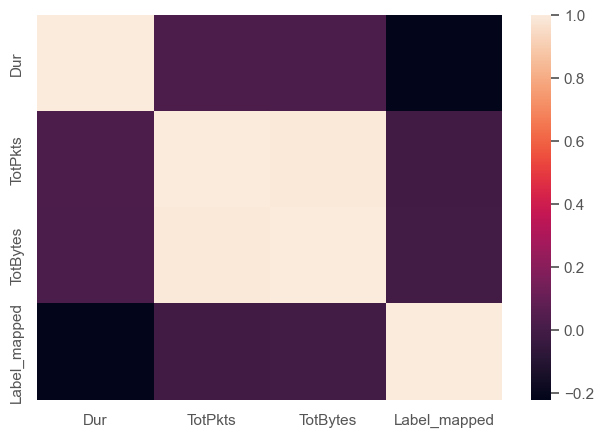

In [10]:
print('###### Correlation matrix between different features  (Dur, TotPkts, Proto_mapped and Label_mapped) ######\n')
corr = df.corr()
plt.figure(figsize=(7.5,5))
sns.heatmap(corr)
plt.show()

# It is possible that the TotPkts and TotBytes are very related but, the number of packets can be so high but the number of bytes so small. Following the same principle, the inverse also could be applied.

In [11]:
#Uncomment if do you want to remove the columns that have a large relation
#For our case, it is not necessary due to we have to remove the features in order to maintain a strong relationship with the InfluxDB database and Mininet traffic collected.
#cor_thr=0.95
#corr_matrix = df.corr().abs()
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > cor_thr)]
#print('>>> Features to drop: ', to_drop)

#for i in to_drop:
 #   df.drop(i,axis = 1,inplace = True)
    
#print('>>> Shape after feature reduction: ', df.shape)
#print('>>> Rows: ', df.shape[0])
#print('>>> Features: ', df.shape[1])
#df.head()

In [12]:
segment_size = int(input('>>> Indicate the size of each segment (50 < SIZE < 200), consider for the minimum size more computation cost: '))
segment_overlap = int(input('>>> Indicate the overlap of each segment (for i=0: 0 + SIZE, for i=1: OVERLAP + SIZE, ...): '))
randomize = input('>>> Do you want to apply randomize?\n1. Yes, apply row random\n2. No\n')

>>> Indicate the size of each segment (50 < SIZE < 200), consider for the minimum size more computation cost: 60
>>> Indicate the overlap of each segment (for i=0: 0 + SIZE, for i=1: OVERLAP + SIZE, ...): 5
>>> Do you want to apply randomize?
1. Yes, apply row random
2. No
2


In [13]:
print('###### Defining a function to segment the all rows in segments of', segment_size, 'rows to introduce them to the 1DCNN ######\n')
print('...')

def create_segments_and_labels(df, time_steps, step, label_name):
    N_FEATURES = df.shape[1] - 1 # Label Encoded
    segments = []
    labels = []
    index_Seg = 0
    
    for i in range(0, len(df) - time_steps, step): # 80 x 38
        seg = []
        for column in df:
            if (column != 'Label' and column != label_name):
                fs = df[column].values[i: i + time_steps]
                seg.append(fs)
        segments.append(seg)        
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        labels.append(label)
        index_Seg+=1

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

if randomize == '1': #For randomize all rows before the segmentation
    df = df.sample(frac=1)    

#Applying segmentation for all the dataset, and saving into X_train
X_train, Y_train = create_segments_and_labels(df, segment_size, segment_overlap, LABEL) #Label is the Label_mapped; 0+10 rows in a segment (i=0), 10+10 (i=1), 20+10 (i=2), ... 

print('###### Done ######')

###### Defining a function to segment the all rows in segments of 60 rows to introduce them to the 1DCNN ######

...


/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/2724591350.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]
/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/2724591350.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0]

###### Done ######


In [14]:
print('###### BEFORE SPLIT INTO TRAINING AND TEST ######')
print('>>> X_train', X_train.shape)
print('>>> Y_train', Y_train.shape)

# Split test and train data 
X_train, X_test, Y_train, Y_test= train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, shuffle=True) #20% test, 80% training
X_train, X_validation, Y_train, Y_validation= train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, shuffle=True) #20% validation, 80% training

print('\n###### AFTER SPLIT INTO TRAINING (80%) AND VALIDATION (20%); RESULTING SHAPES ######')
print('>>> X_train', X_train.shape)
print('>>> Y_train', Y_train.shape)
print('>>> X_validation', X_validation.shape)
print('>>> Y_validation', Y_validation.shape)

print('\n###### TEST SHAPES ######')
print('>>> X_test', X_test.shape)
print('>>> Y_test', Y_test.shape)


###### BEFORE SPLIT INTO TRAINING AND TEST ######
>>> X_train (33217, 60, 3)
>>> Y_train (33217,)

###### AFTER SPLIT INTO TRAINING (80%) AND VALIDATION (20%); RESULTING SHAPES ######
>>> X_train (21258, 60, 3)
>>> Y_train (21258,)
>>> X_validation (5315, 60, 3)
>>> Y_validation (5315,)

###### TEST SHAPES ######
>>> X_test (6644, 60, 3)
>>> Y_test (6644,)


In [15]:
rows_segments, features = X_train.shape[1], X_train.shape[2]

num_classes = le.classes_.size
print('###### LIST OF CLASSES ######')
print(list(le.classes_))

input_shape = (rows_segments*features)
print('\n###### INPUT SHAPE TRAINING, VALIDATION AND TEST ######')
print('>>> training_input_shape:', input_shape)

X_train = X_train.reshape(X_train.shape[0], input_shape)
X_validation = X_validation.reshape(X_validation.shape[0], input_shape)
X_test = X_test.reshape(X_test.shape[0], input_shape)

# Convert type for Keras otherwise Keras cannot process the data
X_train = X_train.astype("float32")
X_validation = X_validation.astype("float32")
X_test = X_test.astype("float32")
Y_train =np.array(Y_train, dtype=int)
Y_validation = np.array(Y_validation, dtype=int)
Y_test = np.array(Y_test, dtype=int)

print('\n###### Y_TRAIN SHAPE ######')
Y_train = np_utils.to_categorical(Y_train, num_classes)
print('>>> New y_train shape: ', Y_train.shape)

print('\n###### Y_VALIDATION SHAPE ######')
Y_validation = np_utils.to_categorical(Y_validation, num_classes)
print('>>> New y_validation shape: ', Y_validation.shape)

print('\n###### Y_TEST SHAPE ######')
Y_test = np_utils.to_categorical(Y_test, num_classes)
print('>>> New Y_test shape: ', Y_test.shape)

###### LIST OF CLASSES ######
['flow=Background', 'flow=From-Botnet']

###### INPUT SHAPE TRAINING, VALIDATION AND TEST ######
>>> training_input_shape: 180

###### Y_TRAIN SHAPE ######
>>> New y_train shape:  (21258, 2)

###### Y_VALIDATION SHAPE ######
>>> New y_validation shape:  (5315, 2)

###### Y_TEST SHAPE ######
>>> New Y_test shape:  (6644, 2)


In [16]:
print('\n###### CHANGING DATA TYPES ######')
X_train = X_train.astype("float32")
X_validation = X_validation.astype("float32")
X_test = X_test.astype("float32")
print('>>> X_train, X_validation and X_test values to float32')

Y_train =Y_train.astype(int)
Y_validation = Y_validation.astype(int)
Y_test = Y_test.astype(int)
print('>>> Y_train, Y_validation and Y_test values to int due to [0, 1] labels')


###### CHANGING DATA TYPES ######
>>> X_train, X_validation and X_test values to float32
>>> Y_train, Y_validation and Y_test values to int due to [0, 1] labels


In [17]:
print('\n###### APPLYING DIFFERENT TECHNIQUES SUCH AS MIN-MAX SCALER ######')

option = input(">>> What technique of class balance do you want to use?\n1. StandardScaler\n2. MaxAbsScaler \n3. MinMaxScaler\n")

if option == "1":
    scaler = StandardScaler()
elif option == "2":
    scaler = MaxAbsScaler()
else:
    scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)
X_test = scaler.fit_transform(X_test)


###### APPLYING DIFFERENT TECHNIQUES SUCH AS MIN-MAX SCALER ######
>>> What technique of class balance do you want to use?
1. StandardScaler
2. MaxAbsScaler 
3. MinMaxScaler
3


In [18]:
print('\n###### STARTING MODEL DEFINITION AND TRAINING PHASE... ######')
print('>>> Training with:\n- Epochs: 500\n- Batch size: '+str(segment_size)+'\n- Early stopping patience: 10 epochs\n- Early stopping monitor: val_accuracy\n- Loss function: binary cross-entropy [0,1]\n- Optimizer: Adam\n- Metric: Accuracy\n')

name = input('>>> Introduce a name for your model: ')
file_path = 'Models/' + datetime.now().strftime("%d%m%Y%H%M%S") + 'model_name_'+name+'.h5'

callbacks_list = [
    ModelCheckpoint(
        filepath=file_path,
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        mode='auto',
        save_freq='epoch'
    ),
    EarlyStopping(monitor='val_accuracy', patience=10),
    CSVLogger('Logs/training_log_'+name+'.log', separator=",", append=True)
]

model_odcnn = Sequential()
model_odcnn.add(Reshape((rows_segments, features), input_shape=(input_shape,)))
model_odcnn.add(Conv1D(100, 10, activation='relu'))
model_odcnn.add(Conv1D(filters=100, kernel_size=10, activation='relu'))
model_odcnn.add(MaxPooling1D(3))   # ---> output matrix afteer maxpooling is 1/3 from the input matrix
model_odcnn.add(Conv1D(160, 10, activation='relu'))
model_odcnn.add(GlobalAveragePooling1D())    # ---> only catch 1 average
model_odcnn.add(Dropout(0.5))    # ---> 50% random neurons will be reset with a weight=0
model_odcnn.add(Dense(num_classes, activation='softmax'))
print(model_odcnn.summary())


model_odcnn.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

history = model_odcnn.fit(X_train,
                      Y_train,
                      batch_size=segment_size,
                      epochs=50,
                      callbacks=callbacks_list,
                      validation_data=(X_validation, Y_validation),
                      verbose=1)

model_odcnn.save(file_path)

history_dict = history.history
history_dict.keys()


###### STARTING MODEL DEFINITION AND TRAINING PHASE... ######
>>> Training with:
- Epochs: 500
- Batch size: 60
- Early stopping patience: 10 epochs
- Early stopping monitor: val_accuracy
- Loss function: binary cross-entropy [0,1]
- Optimizer: Adam
- Metric: Accuracy

>>> Introduce a name for your model: ProtoDrop_noRandomRows_segmentation60&5_MinMaxScaler
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 60, 3)             0         
                                                                 
 conv1d (Conv1D)             (None, 51, 100)           3100      
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 100)           100100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 100)          0         
 )                       

2023-01-18 18:55:57.419535: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


355/355 [==============================] - 4s 12ms/step - loss: 0.2843 - accuracy: 0.8992 - val_loss: 0.2577 - val_accuracy: 0.9362
Epoch 2/50
355/355 [==============================] - 4s 12ms/step - loss: 0.2302 - accuracy: 0.9291 - val_loss: 0.1947 - val_accuracy: 0.9357
Epoch 3/50
355/355 [==============================] - 4s 12ms/step - loss: 0.2009 - accuracy: 0.9361 - val_loss: 0.3557 - val_accuracy: 0.9735
Epoch 4/50
355/355 [==============================] - 4s 12ms/step - loss: 0.1771 - accuracy: 0.9408 - val_loss: 0.1288 - val_accuracy: 0.9691
Epoch 5/50
355/355 [==============================] - 4s 13ms/step - loss: 0.1527 - accuracy: 0.9501 - val_loss: 0.1046 - val_accuracy: 0.9712
Epoch 6/50
355/355 [==============================] - 5s 13ms/step - loss: 0.1362 - accuracy: 0.9596 - val_loss: 0.1066 - val_accuracy: 0.9746
Epoch 7/50
355/355 [==============================] - 4s 13ms/step - loss: 0.1255 - accuracy: 0.9641 - val_loss: 0.1054 - val_accuracy: 0.9765
Epoch 8/50

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
callbacks_list[1].stopped_epoch

28

/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/4152717645.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196, 1)). The keyword argument will take precedence.
  plt.plot(range(0, num_epochs), loss, 'g', label='Training loss', color='red')
/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/4152717645.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(range(0, num_epochs), val_loss, 'g--', label='Validation loss', color='green')
/var/folders/nc/j7kq41j57rl543lvmq_93sv8nk4y_w/T/ipykernel_53536/4152717645.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196, 1)). The keyword argument will take p

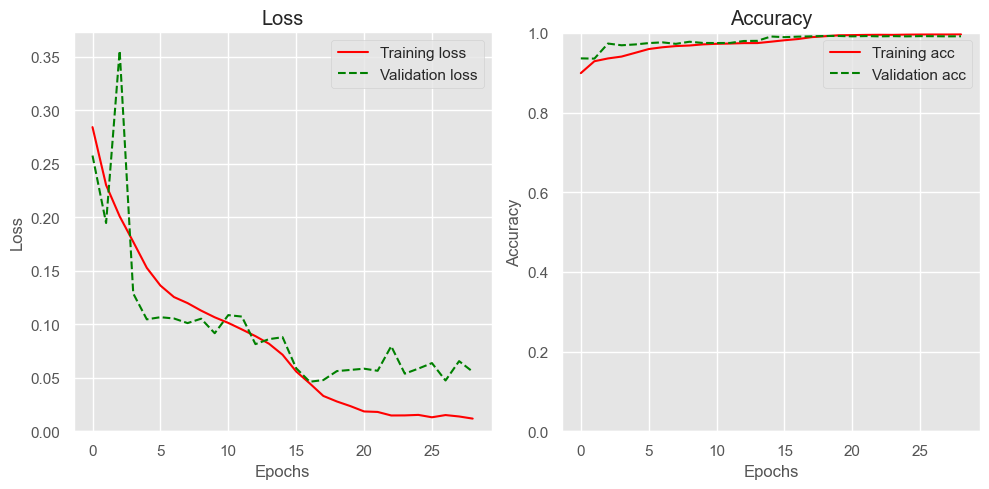

In [20]:
if ( callbacks_list[1].stopped_epoch == 0 ):
    num_epochs = 50
else:
    num_epochs = callbacks_list[1].stopped_epoch+1

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
    
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(range(0, num_epochs), loss, 'g', label='Training loss', color='red')
plt.plot(range(0, num_epochs), val_loss, 'g--', label='Validation loss', color='green')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0)
plt.tight_layout()
# 
plt.subplot(1, 2, 2)
plt.plot(range(0, num_epochs), accuracy, 'g', label='Training acc', color='red')
plt.plot(range(0, num_epochs), val_acc, 'g--', label='Validation acc', color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0)
plt.tight_layout()

plt.savefig(file_path+'.png')

plt.show()




###### LAST PART: ANALYZING TRAINING RESULTS AND TESTING RESULTS ######


############################## CHECKING TRAIN RESULTS ##############################

>>> Evaluating training results...
665/665 [==============================] - 2s 2ms/step - loss: 0.0088 - accuracy: 0.9976

Accuracy on train data: 1.00

Loss on train drata: 0.01

>>> Generating confusion matrix for the train results...
665/665 [==============================] - 2s 2ms/step


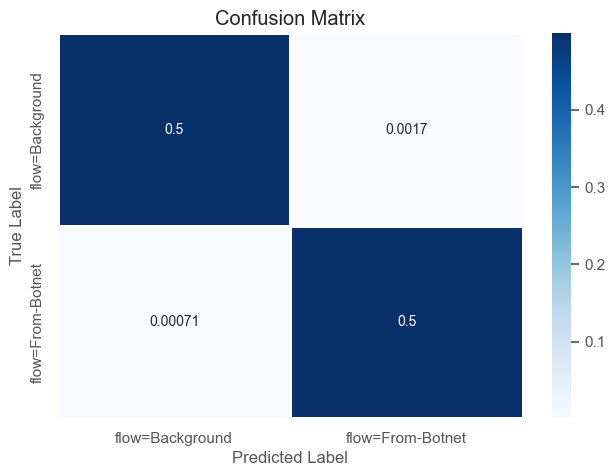


>>> Generating classification report for the training results...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10633
           1       1.00      1.00      1.00     10625

    accuracy                           1.00     21258
   macro avg       1.00      1.00      1.00     21258
weighted avg       1.00      1.00      1.00     21258


############################## CHECKING VALIDATION RESULTS ##############################n
>>> Evaluating validation results...
167/167 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9917

Accuracy on validation data: 0.99

Loss on validation data: 0.06

>>> Generating confusion matrix for the validation results...
167/167 [==============================] - 0s 2ms/step


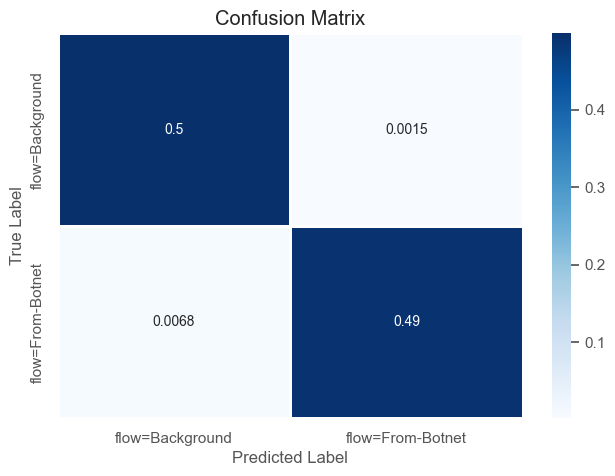


>>> Generating classification report for the validation results...
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2659
           1       1.00      0.99      0.99      2656

    accuracy                           0.99      5315
   macro avg       0.99      0.99      0.99      5315
weighted avg       0.99      0.99      0.99      5315


############################## TESTING PHASE ##############################n

>>> Generating confusion matrix for testing phase...
208/208 [==============================] - 0s 2ms/step


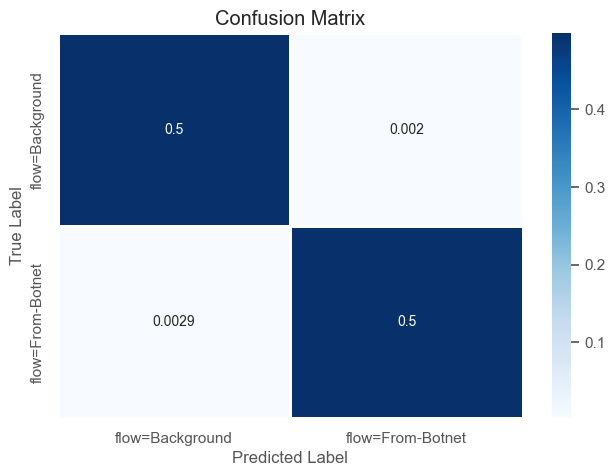


>>> Generating classification report for the testing phase...
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3323
           1       1.00      0.99      1.00      3321

    accuracy                           1.00      6644
   macro avg       1.00      1.00      1.00      6644
weighted avg       1.00      1.00      1.00      6644



In [21]:
def show_confusion_matrix(validations, predictions, option):

    matrix = metrics.confusion_matrix(validations, predictions, normalize='all') #, normalize='all', labels=list(labels_mapping.values())
    plt.figure(figsize=(7.5,5))
    sns.heatmap(matrix,
                cmap="Blues",
                linewidths=1,
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                annot=True,
                # fmt='d'
               )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    if option == 1:
        plt.savefig(file_path+'_'+name+'trainingMatrix.png') #For training
    elif option == 2:
        plt.savefig(file_path+'_'+name+'validationMatrix.png') #For validation
    else:
        plt.savefig(file_path+'_'+name+'testingMatrix.png') #For testing

    plt.show()
    
print('\n###### LAST PART: ANALYZING TRAINING RESULTS AND TESTING RESULTS ######\n')

print('\n############################## CHECKING TRAIN RESULTS ##############################\n')

print('>>> Evaluating training results...')
score = model_odcnn.evaluate(X_train, Y_train, verbose=1)
print("\nAccuracy on train data: %0.2f" % score[1])
print("\nLoss on train drata: %0.2f" % score[0])

# %%

print('\n>>> Generating confusion matrix for the train results...')

y_pred_train = model_odcnn.predict(X_train)
# Take the class with the highest probability from the test predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(Y_train, axis=1)

show_confusion_matrix(max_y_train, max_y_pred_train, 1)

print('\n>>> Generating classification report for the training results...')
print(classification_report(max_y_train, max_y_pred_train))

print('\n############################## CHECKING VALIDATION RESULTS ##############################n')

print('>>> Evaluating validation results...')
score = model_odcnn.evaluate(X_validation, Y_validation, verbose=1)
print("\nAccuracy on validation data: %0.2f" % score[1])
print("\nLoss on validation data: %0.2f" % score[0])

# %%

print('\n>>> Generating confusion matrix for the validation results...')

y_pred_validation = model_odcnn.predict(X_validation)
# Take the class with the highest probability from the test predictions
max_y_pred_validation = np.argmax(y_pred_validation, axis=1)
max_y_validation = np.argmax(Y_validation, axis=1)

show_confusion_matrix(max_y_validation, max_y_pred_validation, 2)

print('\n>>> Generating classification report for the validation results...')
print(classification_report(max_y_validation, max_y_pred_validation))


print('\n############################## TESTING PHASE ##############################n')

print('\n>>> Generating confusion matrix for testing phase...')
y_pred_test = model_odcnn.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test, 3)

print('\n>>> Generating classification report for the testing phase...')
print(classification_report(max_y_test, max_y_pred_test))